In [2]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title Data retrieval
import os, requests

fname = ['steinmetz_st.npz']
fname.append('steinmetz_wav.npz')
fname.append('steinmetz_lfp.npz')

url = ["https://osf.io/4bjns/download"]
url.append("https://osf.io/ugm9v/download")
url.append("https://osf.io/kx3v9/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

In [3]:
# @title Data loading

dat_ST = np.load('data/steinmetz_st.npz', allow_pickle=True)['dat']

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx.
dat = dat_ST[11]
print(dat.keys())

dict_keys(['ss', 'ss_passive'])


In [4]:
dat['ss'].shape

(698, 340)

In [142]:
dat['ss'][1].shape

(340,)

In [143]:
for i in []:
    print('h')

In [151]:
raster = []
for n in range(len(dat['ss'][:,0])):
    for t in dat['ss'][n,0]:
        raster.append(np.array([n,t]))
raster = np.array(raster)
    

In [152]:
spikes = raster.T[1]
labels = raster.T[0]
spikes = (spikes*1000).astype('int')

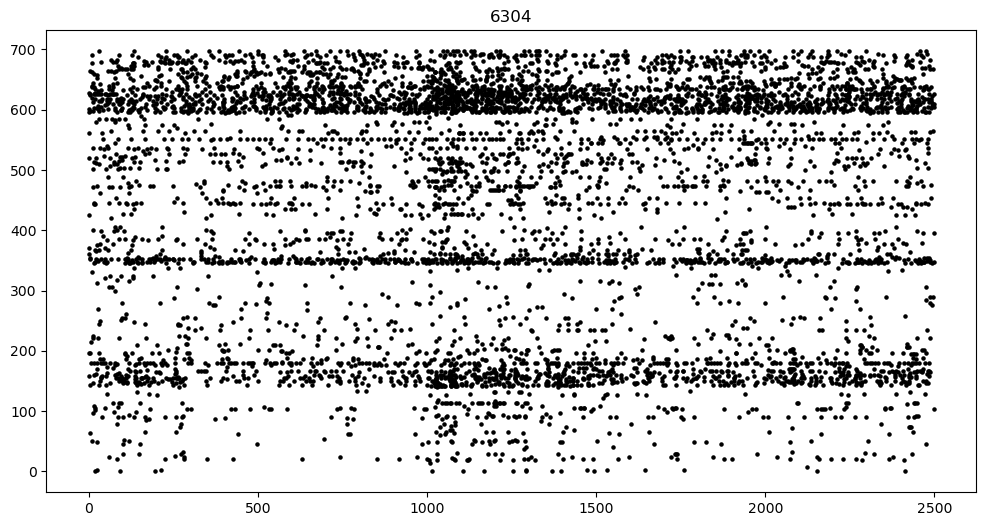

In [154]:
plt.figure(figsize=(12,6))
plt.scatter(spikes,labels,s=5,c='black')
plt.title(len(spikes))
plt.show()

In [155]:
def get_imgs(N, pattern_template):
    if len(pattern_template) == 0:
        print('FAIL')
        return pattern_template, None
    
    win_size = (N,1+max([max(k[:,0]) for k in pattern_template]))
    pattern_img = np.zeros((len(pattern_template),*win_size))
    for p,pattern in enumerate(pattern_template):
        for (i,j) in pattern:
            pattern_img[p,j,i] = 1
            
    pattern_img = pattern_img.transpose((1,2,0))
    
    return pattern_template, pattern_img

In [12]:
import scan
import simulate_data
pattern_template, all_times, window_time, cluster_time, sequence_time = scan.scan_raster(spikes,labels.astype('int'),window_dim=100)


pattern_template_copy, pattern_img = get_imgs(1+max(labels.astype('int')),pattern_template)

times,units = spikes, labels.astype('int')

raster = np.zeros((max((times).astype('int'))+1, 1+max(units)))
print(raster.shape, pattern_img.shape)
for i in range(len(times)):
    raster[int(times[i]),units[i]]=1
print('done')

6295 Windows
321 patterns found..... 100%10.01 | opt_cutoff - 1.37 | most_detections - 1etections - 1


In [ ]:
# fix the below part so that I use all_times instead of sanity check

In [ ]:
counts = np.array([list(np.where(sanity_check==1)[1]).count(k) for k in np.unique(np.where(sanity_check==1)[1])])
patterns = np.unique(np.where(sanity_check==1)[1])
pattern_template = np.array(pattern_template,dtype='object')
np.array(patterns), np.array(counts), np.array([len(k) for k in pattern_template[patterns]])

In [131]:
D_ = pattern_img.shape[1]
sanity_check = np.zeros((raster.shape[0],pattern_img.shape[2]))
for j in tqdm(range(pattern_img.shape[2])):
    for i in range(raster.shape[0]-D_):
        sanity_check[i,j] = np.sum(pattern_img[...,j]*raster.T[:,i:i+D_])
    sanity_check[:,j] = sanity_check[:,j]/np.sum(pattern_img[...,j])

100%|████████████████████████████████████████████████████████████████████████████████| 321/321 [37:03<00:00,  6.93s/it]


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

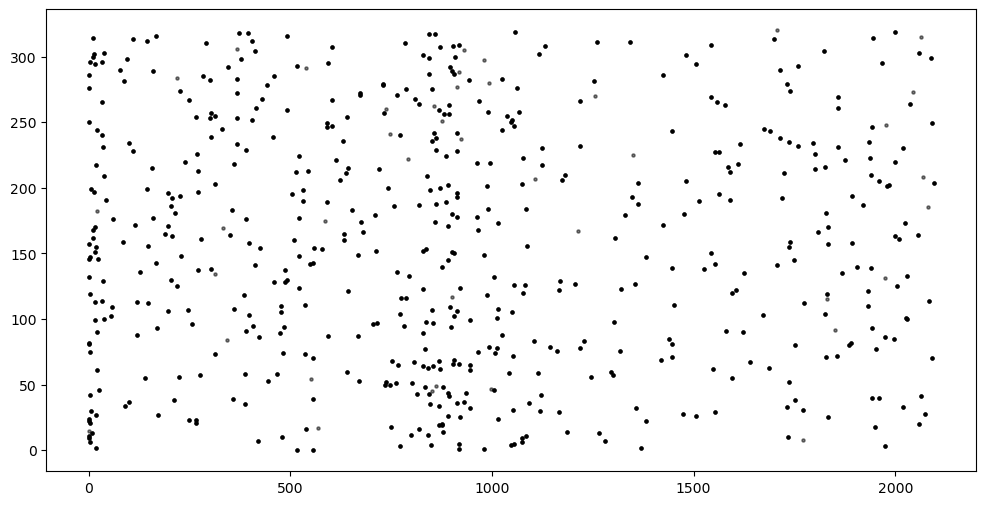

In [137]:
plt.figure(figsize=(12,6))
plt.scatter(*np.where(sanity_check==1), s=5,c='black',alpha=0.5)
y,x = patterns[counts>=2][np.where(sanity_check[:,patterns[counts>=2]]==1)[1]], np.where(sanity_check[:,patterns[counts>=2]]==1)[0]
plt.scatter(x,y, c='black',s=5)
plt.show()

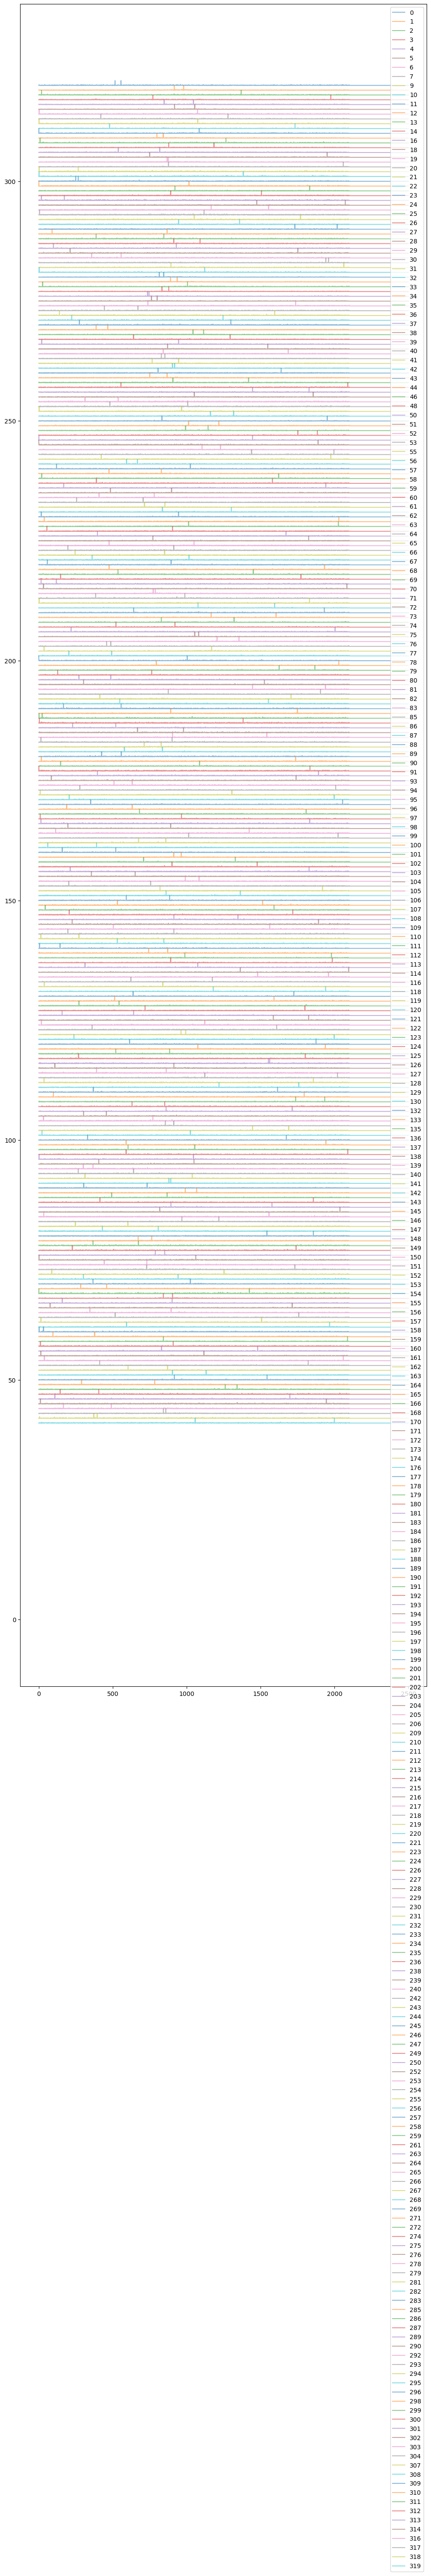

In [141]:
plt.figure(figsize=(12,50))
for i,k in enumerate(patterns[counts>=2]):
    plt.plot(sanity_check[:,k]+len(patterns)-i,label=k,alpha=0.5)
    plt.scatter(np.where(sanity_check[:,k]==1)[0], np.ones_like(np.where(sanity_check[:,k]==1)[0])+len(patterns[counts>=2])-i,c='white',s=100)
    plt.legend()
plt.show()

In [154]:
temp_idc = pattern_template[0].T[1]
temp_idc

array([624, 596, 622, 179, 149, 347, 660, 603, 353, 639, 613, 639, 347,
       346, 513, 630, 346, 691, 179, 603, 600, 617, 647, 680])

In [176]:
filt = [bool(k in temp_idc) for k in labels]

In [181]:
len(np.unique(temp_idc))

19

In [182]:
((1346/19)/2.5)

28.336842105263155

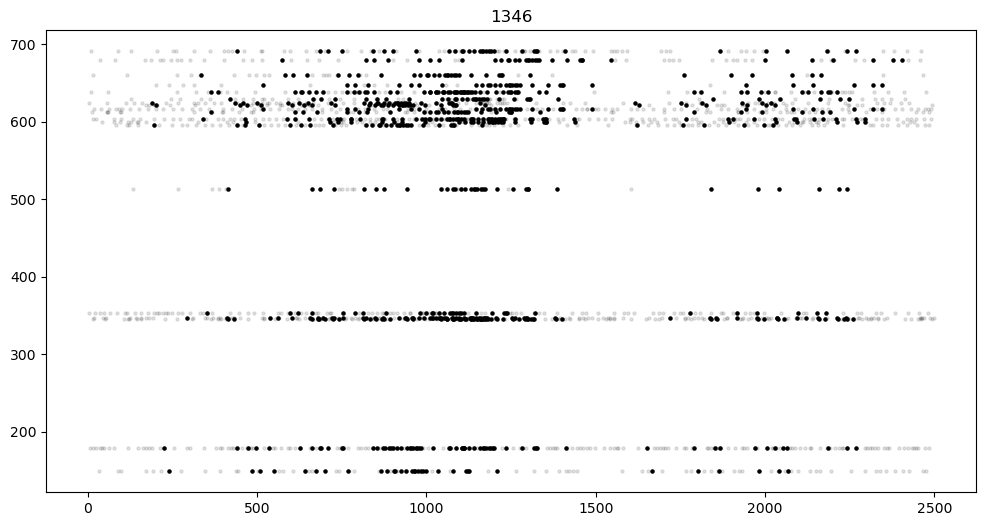

In [195]:
plt.figure(figsize=(12,6))
plt.title(len(spikes[filt]))
plt.scatter(spikes[filt],labels[filt],s=5,c='black',alpha=0.1)
[plt.scatter(pattern_template[0].T[0]+i, pattern_template[0].T[1],s=5,c='black') for i in np.where(debug==1)[0]]
plt.show()

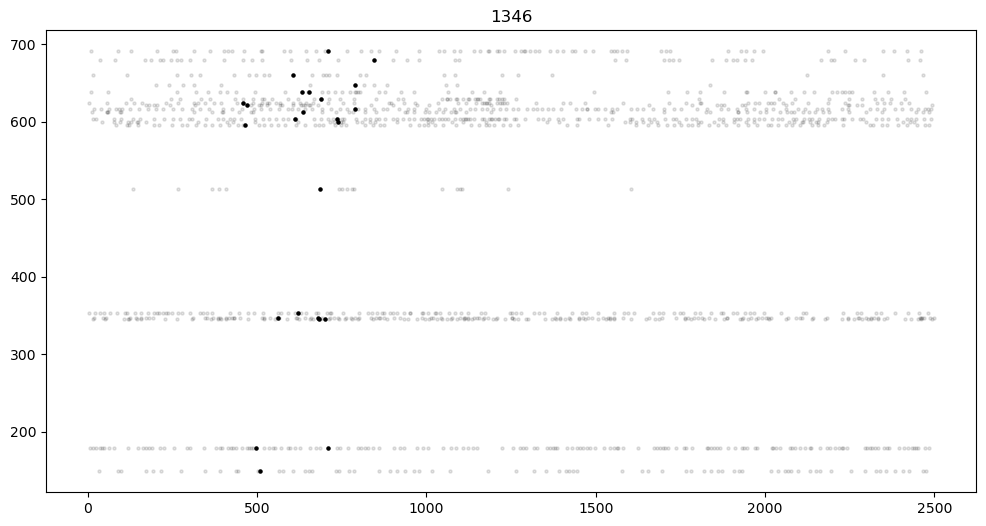

In [217]:
plt.figure(figsize=(12,6))
j=3
plt.title(len(spikes[filt]))
plt.scatter(spikes[filt],labels[filt],s=5,c='black',alpha=0.1)
[plt.scatter(pattern_template[0].T[0]+i, pattern_template[0].T[1],s=5,c='black') for i in np.where(debug==1)[0][j-1:j]]
plt.show()

In [188]:
np.array(patterns), np.array(counts), np.array([len(k) for k in pattern_template])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177